In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv


import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('psy_mark.csv')

None

In [122]:
df = df[df.columns[np.arange(1,14)]]

In [123]:
df

,Ваш средний балл. Например 7.38,Ваш курс.,Ваш пол?,Кем вы себя считаете?,Вы курите?,Вы пьёте алкоголь?,Играете в компьютерные игры?,Часто гуляете на свежем воздухе?,Занимаетесь спортом?,Много проводите время в соц.сетях?,Соблюдаете порядок на рабочем месте?,Была ли у вас золотая медаль в школе?,Списываете ли вы домашнее задание?
0,8.79,2,Мужской,Экстраверт,Не курю,Пью,"Да, часто",Нет,"Да, немного",Нет,Нет,Нет,Катать - это моё)
1,7.38,2,Женский,Интроверт,Не курю,Пью,"Да, иногда",Да,"Да, немного",Да,Да,Да,"В основном сам, но бывает, что катаю."
2,9.17,2,Мужской,Амбиверт,Не курю,Пью,"Да, иногда",Нет,"Да, немного",Да,Да,Да,Делаю почти всё сам
3,9.30,1,Мужской,Амбиверт,Не курю,Пью,"Да, иногда",Да,"Да, много",Да,Нет,Нет,Катать - это моё)
4,8.13,1,Мужской,Экстраверт,Не курю,Пью,"Да, редко",Да,"Да, немного",Да,Нет,Нет,"В основном сам, но бывает, что катаю."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,8.96,4,Мужской,Амбиверт,Не курю,Пью,Нет,Да,"Да, много",Да,Да,Да,Катать - это моё)
226,7.5,4,Мужской,Интроверт,Не курю,Не пью,"Да, иногда",Нет,"Да, немного",Нет,Нет,Да,"В основном сам, но бывает, что катаю."
227,5.86,4,Мужской,Амбиверт,Не курю,Не пью,"Да, часто",Нет,Нет,Да,Да,Нет,Катать - это моё)
228,6.2,4,Мужской,Амбиверт,Не курю,Не пью,"Да, иногда",Да,"Да, много",Да,Нет,Да,"В основном сам, но бывает, что катаю."


Очистка данных

In [124]:
df["Ваш средний балл. Например 7.38"] = df["Ваш средний балл. Например 7.38"].str.replace(',','.')

In [125]:
print(df.shape)

df = df[df["Ваш средний балл. Например 7.38"].str.len().le(4)]
print(df.shape)

df["Ваш средний балл. Например 7.38"] = pd.to_numeric(df["Ваш средний балл. Например 7.38"], errors='coerce')

df = df.loc[df["Ваш средний балл. Например 7.38"] > 4.01]
df = df.loc[df["Ваш средний балл. Например 7.38"] < 9.98]
print(df.shape)

None

(230, 13)
(223, 13)
(223, 13)


One-hot кодирование

In [129]:
multi_indicates = np.array([3, 6, 8, 12])
non_multi_indicates = np.array([1, 2, 4, 5, 7, 9, 10, 11])

multi_data = df[df.columns[multi_indicates]]
non_multi_data = df[df.columns[non_multi_indicates]]

In [130]:
Y = df["Ваш средний балл. Например 7.38"]
d_1 = pd.get_dummies(multi_data, drop_first = False)
d_2 = pd.get_dummies(non_multi_data, drop_first = True)

data = pd.concat([Y, d_1, d_2], axis=1)
data

Функция отрисовки столбчатых диаграмм

In [133]:
norm = 6.8

In [134]:
def plot_set(name):
    sns.set_style('ticks')
    ax.bar(groups, counts, width = 0.4, bottom = 0, color = colors)

    for i, v in enumerate(counts):
      ax.text(i-0.1, v + 0.006, str(v + norm),
              color = 'black', fontweight = 'bold')

    plt.title(name, fontsize = 20)
    plt.xlabel(None)
    plt.xticks(fontsize=15)
    plt.grid(False)

    sns.despine(bottom=True, left=True)
    ax.set_facecolor("white")
    plt.yticks([])


    plt.show()


Средний бал студентов

In [135]:
mean = round(data["Ваш средний балл. Например 7.38"].mean(), 2)
print(round(mean, 2))

7.43


Влияние пола на средний бал

In [136]:
m = data[data["Ваш пол?_Мужской"] == 1]
m_mean = round(m["Ваш средний балл. Например 7.38"].mean(), 2)

w = data[data["Ваш пол?_Мужской"] == 0]
w_mean = round(w["Ваш средний балл. Например 7.38"].mean(), 2)

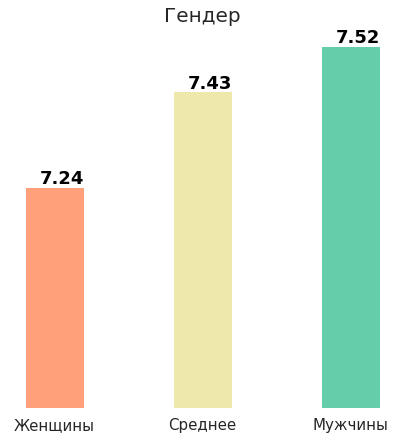

In [137]:
groups = ["Женщины", "Среднее", "Мужчины"]
counts = np.array([w_mean, mean, m_mean]) - norm 
colors= ["lightsalmon","palegoldenrod", "mediumaquamarine"]
fig, ax = plt.subplots(figsize=(7,7))

plot_set("Гендер")

Интрове́рсия

In [138]:
ecstro = data[data["Кем вы себя считаете?_Экстраверт"] == 1]
ecstro_mean = round(ecstro["Ваш средний балл. Например 7.38"].mean(), 2)

ambi = data[data["Кем вы себя считаете?_Амбиверт"] == 1]
ambi_mean = round(ambi["Ваш средний балл. Например 7.38"].mean(), 2)

intro = data[data["Кем вы себя считаете?_Интроверт"] == 1]
intro_mean = round(intro["Ваш средний балл. Например 7.38"].mean(), 2)

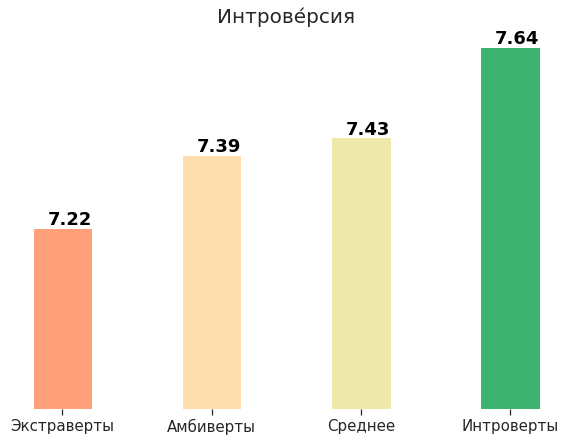

In [139]:
groups = ["Экстраверты", "Амбиверты", "Среднее", "Интроверты"]
counts = np.array([ecstro_mean, ambi_mean, mean, intro_mean]) - norm 
colors= ["lightsalmon", "navajowhite", "palegoldenrod", "mediumseagreen"]
fig, ax = plt.subplots(figsize=(10,7))

plot_set("Интрове́рсия")

Алкоголь и курение

In [140]:
bad = data[(data["Вы пьёте алкоголь?_Пью"] == 1) & (data["Вы курите?_Не курю"] == 0)]
bad_mean = round(bad["Ваш средний балл. Например 7.38"].mean(), 2)

good = data[(data["Вы пьёте алкоголь?_Пью"] == 0) & (data["Вы курите?_Не курю"] == 1)]
good_mean = round(good["Ваш средний балл. Например 7.38"].mean(), 2)

bad_pivo = data[data["Вы пьёте алкоголь?_Пью"] == 1]
bad_pivo_mean = round(bad_pivo["Ваш средний балл. Например 7.38"].mean(), 2)

good_pivo = data[data["Вы пьёте алкоголь?_Пью"] == 0]
good_pivo_mean = round(good_pivo["Ваш средний балл. Например 7.38"].mean(), 2)

bad_sigi= data[data["Вы курите?_Не курю"] == 0]
bad_sigi_mean = round(bad_sigi["Ваш средний балл. Например 7.38"].mean(), 2)

good_sigi = data[data["Вы курите?_Не курю"] == 1]
good_sigi_mean = round(good_sigi["Ваш средний балл. Например 7.38"].mean(), 2)

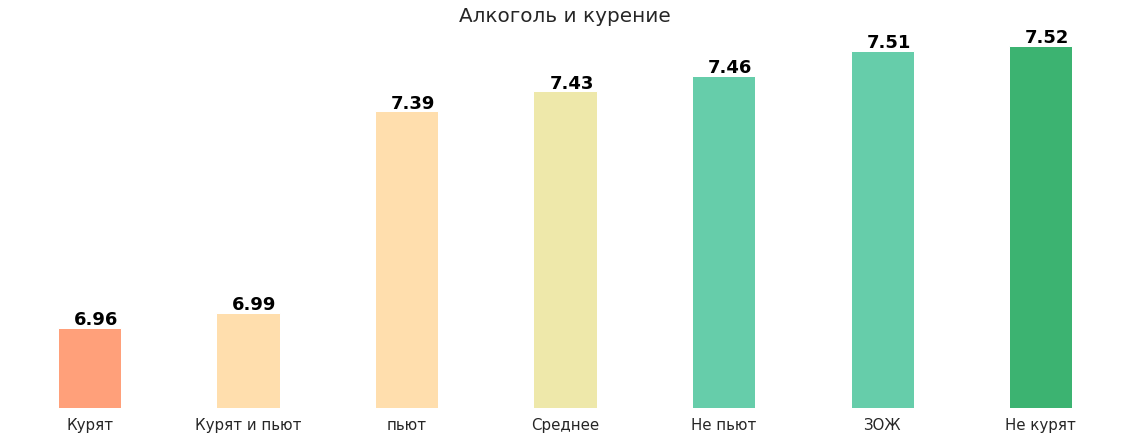

In [172]:
groups = ["Курят", "Курят и пьют", "пьют", "Среднее", "Не пьют", "ЗОЖ", "Не курят"]
counts = np.array([bad_sigi_mean, bad_mean, bad_pivo_mean, mean, good_pivo_mean, good_mean, good_sigi_mean]) - norm 
colors= ["lightsalmon", "navajowhite", "navajowhite", "palegoldenrod", "mediumaquamarine", "mediumaquamarine", "mediumseagreen"]
fig, ax = plt.subplots(figsize=(20,7))

plot_set("Алкоголь и курение")

Компьютерные игры

In [142]:
ocmnoga = data[data["Играете в компьютерные игры?_Да, часто"] == 1]
ocmnoga_mean = round(ocmnoga["Ваш средний балл. Например 7.38"].mean(), 2)

mnoga = data[data["Играете в компьютерные игры?_Да, иногда"] == 1]
mnoga_mean = round(mnoga["Ваш средний балл. Например 7.38"].mean(), 2)

nemnoga = data[data["Играете в компьютерные игры?_Да, редко"] == 1]
nemnoga_mean = round(nemnoga["Ваш средний балл. Например 7.38"].mean(), 2)

net = data[data["Играете в компьютерные игры?_Нет"] == 1]
net_mean = round(net["Ваш средний балл. Например 7.38"].mean(), 2)

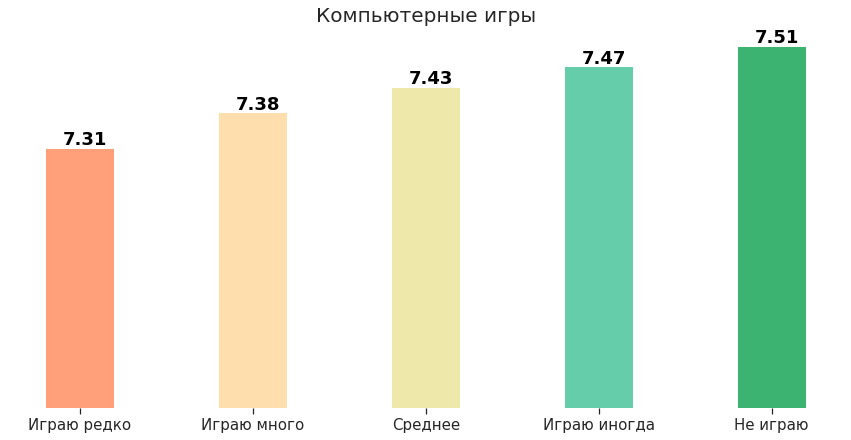

In [173]:
groups = ["Играю редко", "Играю много", "Среднее", "Играю иногда", "Не играю"]
counts = np.array([nemnoga_mean, ocmnoga_mean, mean, mnoga_mean, net_mean]) - norm 
colors= ["lightsalmon", "navajowhite", "palegoldenrod", "mediumaquamarine", "mediumseagreen"]
fig, ax = plt.subplots(figsize=(15,7))

plot_set("Компьютерные игры")

Влияние прогулок на свежем воздухе на средний балл

In [145]:
gul = data[data["Часто гуляете на свежем воздухе?_Нет"] == 0]
gul_mean = round(gul["Ваш средний балл. Например 7.38"].mean(), 2)

negul = data[data["Часто гуляете на свежем воздухе?_Нет"] == 1]
negul_mean = round(negul["Ваш средний балл. Например 7.38"].mean(), 2)

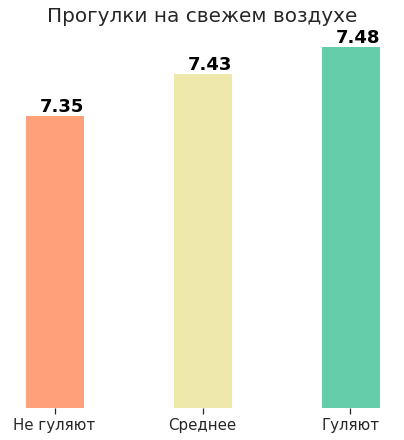

In [146]:
groups = ["Не гуляют", "Среднее", "Гуляют"]
counts = np.array([negul_mean, mean, gul_mean]) - norm 
colors= ["lightsalmon","palegoldenrod", "mediumaquamarine"]
fig, ax = plt.subplots(figsize=(7,7))

plot_set("Прогулки на свежем воздухе")

Спорт

In [147]:
so = data[data["Занимаетесь спортом?_Да, много"] == 1]
so_mean = round(so["Ваш средний балл. Например 7.38"].mean(), 2)

sm = data[data["Занимаетесь спортом?_Да, немного"] == 1]
sm_mean = round(sm["Ваш средний балл. Например 7.38"].mean(), 2)

n = data[data["Занимаетесь спортом?_Нет"] == 1]
n_mean = round(n["Ваш средний балл. Например 7.38"].mean(), 2)

n = data[data["Занимаетесь спортом?_Нет"] == 1]
n_mean = round(n["Ваш средний балл. Например 7.38"].mean(), 2)

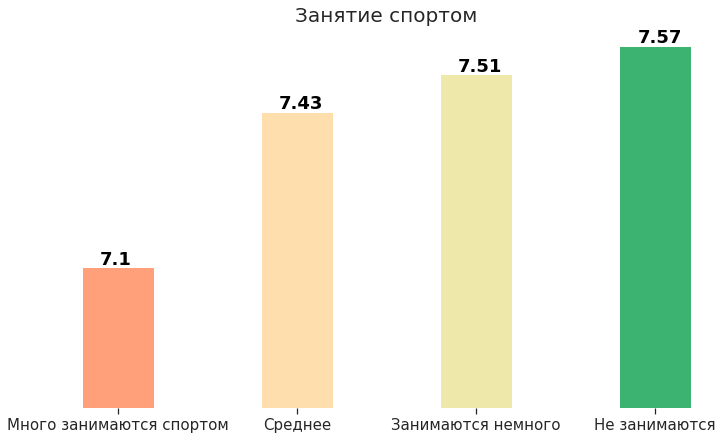

In [174]:
groups = ["Много занимаются спортом", "Среднее", "Занимаются немного", "Не занимаются"]
counts = np.array([so_mean, mean, sm_mean, n_mean]) - norm 
colors= ["lightsalmon", "navajowhite", "palegoldenrod", "mediumseagreen"]
fig, ax = plt.subplots(figsize=(12,7))

plot_set("Занятие спортом")

Соцсети

In [149]:
seti  = data[data["Много проводите время в соц.сетях?_Нет"] == 0]
seti_mean = round(seti["Ваш средний балл. Например 7.38"].mean(), 2)

neseti = data[data["Много проводите время в соц.сетях?_Нет"] == 1]
neseti_mean = round(neseti["Ваш средний балл. Например 7.38"].mean(), 2)

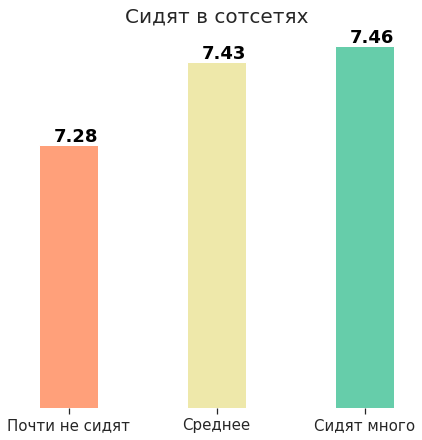

In [150]:
groups = ["Почти не сидят", "Среднее", "Сидят много"]
counts = np.array([neseti_mean, mean, seti_mean]) - norm 
colors= ["lightsalmon","palegoldenrod", "mediumaquamarine"]
fig, ax = plt.subplots(figsize=(7,7))

plot_set("Сидят в сотсетях")

Порядок на рабочем месте

In [151]:
poriadoc= data[data["Соблюдаете порядок на рабочем месте?_Нет"] == 0]
poriadoc_mean = round(poriadoc["Ваш средний балл. Например 7.38"].mean(), 2)

neporiadoc = data[data["Соблюдаете порядок на рабочем месте?_Нет"] == 1]
neporiadoc_mean = round(neporiadoc["Ваш средний балл. Например 7.38"].mean(), 2)

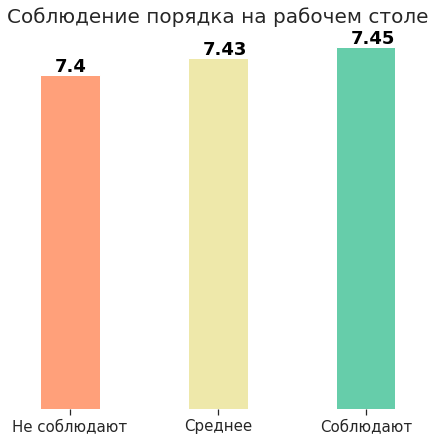

In [152]:
groups = ["Не соблюдают", "Среднее", "Соблюдают"]
counts = np.array([neporiadoc_mean, mean, poriadoc_mean]) - norm 
colors= ["lightsalmon","palegoldenrod", "mediumaquamarine"]
fig, ax = plt.subplots(figsize=(7,7))

plot_set("Соблюдение порядка на рабочем столе")

Золотая медаль

In [153]:
zo = data[data["Была ли у вас золотая медаль в школе?_Нет"] == 0]
zo_mean = round(zo["Ваш средний балл. Например 7.38"].mean(), 2)

nezo = data[data["Была ли у вас золотая медаль в школе?_Нет"] == 1]
nezo_mean = round(nezo["Ваш средний балл. Например 7.38"].mean(), 2)

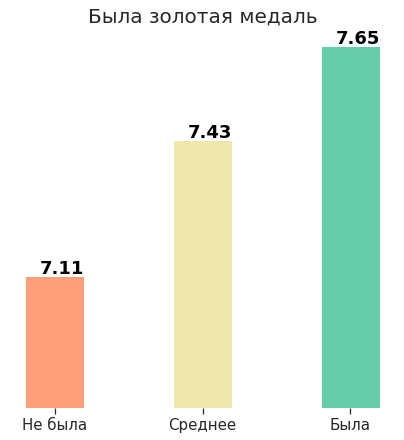

In [154]:
groups = ["Не была", "Среднее", "Была"]
counts = np.array([nezo_mean, mean, zo_mean]) - norm 
colors= ["lightsalmon","palegoldenrod", "mediumaquamarine"]
fig, ax = plt.subplots(figsize=(7,7))

plot_set("Была золотая медаль")

Списывание домашнего задание

In [155]:
sam = data[data["Списываете ли вы домашнее задание?_Делаю почти всё сам"] == 1]
sam_mean = round(sam["Ваш средний балл. Например 7.38"].mean(), 2)

skat = data[data["Списываете ли вы домашнее задание?_Катать - это моё)"] == 1]
skat_mean = round(skat["Ваш средний балл. Например 7.38"].mean(), 2)

mez = data[data["Списываете ли вы домашнее задание?_В основном сам, но бывает, что катаю."] == 1]
mez_mean = round(mez["Ваш средний балл. Например 7.38"].mean(), 2)

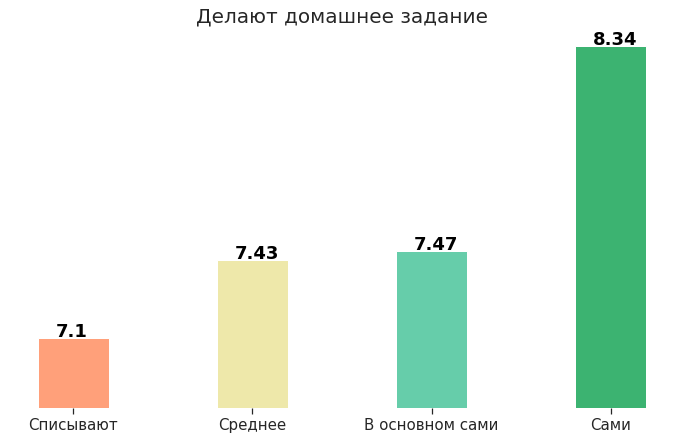

In [156]:
groups = ["Списывают", "Среднее", "В основном сами", "Сами"]
counts = np.array([skat_mean, mean, mez_mean, sam_mean]) - norm 
colors= ["lightsalmon","palegoldenrod", "mediumaquamarine", "mediumseagreen"]
fig, ax = plt.subplots(figsize=(12,7))

plot_set("Делают домашнее задание")

Гистограммы

Распитие алкоголя старшеми и младшими курсами

In [157]:
per_pivo = data[(data["Вы пьёте алкоголь?_Пью"] == 1) & (data["Ваш курс."] == 1) | (data["Ваш курс."] == 2)]

per_nepivo = data[(data["Вы пьёте алкоголь?_Пью"] == 0) & (data["Ваш курс."] == 1) | (data["Ваш курс."] == 2)]

star_pivo = data[(data["Вы пьёте алкоголь?_Пью"] == 1) & (data["Ваш курс."] == 3) | (data["Ваш курс."] == 4)]

star_nepivo = data[(data["Вы пьёте алкоголь?_Пью"] == 0) & (data["Ваш курс."] == 3) | (data["Ваш курс."] == 4)]

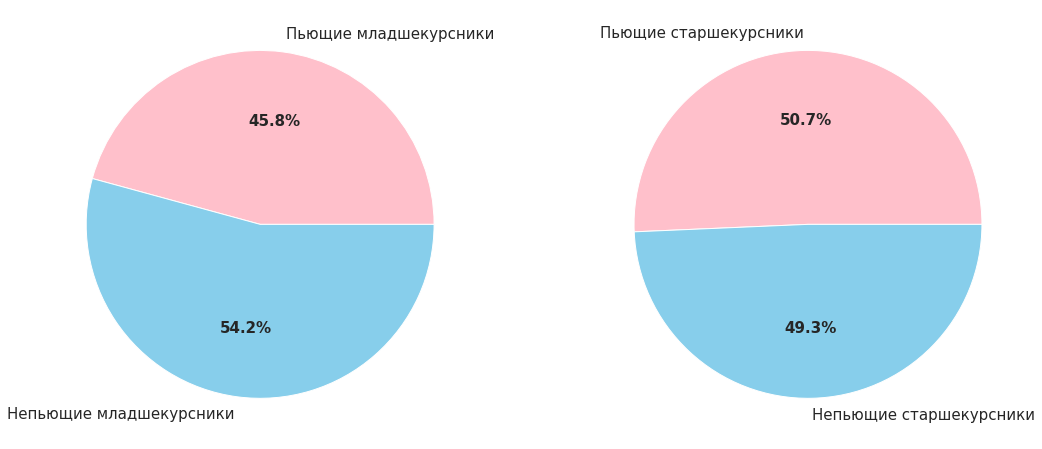

In [158]:
y_per = np.array([len(per_pivo), len(per_nepivo)])
perlabels = ["Пьющие младшекурсники", "Непьющие младшекурсники"]
y_star = np.array([len(star_pivo), len(star_nepivo)])
starlabels = ["Пьющие старшекурсники", "Непьющие старшекурсники"]

mycolors = ["pink", "skyblue"]

plt.figure(figsize=(18, 8))

plt.subplot(1, 2 ,1)
_, text, proc = plt.pie(y_per, labels = perlabels, colors = mycolors, autopct='%.1f%%')
plt.setp(proc, size = 15, weight ="bold")
plt.setp(text, size = 15)

plt.subplot(1, 2, 2)
_, text, proc = plt.pie(y_star, labels = starlabels, colors = mycolors, autopct='%.1f%%')
plt.setp(proc, size = 15, weight ="bold")
plt.setp(text, size = 15)

plt.show() 

Играют в компютерные мгры

In [159]:
per_ocmnoga = data[(data["Вы пьёте алкоголь?_Пью"] == 1) & (data["Ваш пол?_Мужской"] == 1)]
per_mnoga = data[(data["Вы пьёте алкоголь?_Пью"] == 0) & (data["Ваш пол?_Мужской"] == 1)]
per_nemnoga = data[(data["Вы пьёте алкоголь?_Пью"] == 1) & (data["Ваш пол?_Мужской"] == 1)]
per_net = data[(data["Вы пьёте алкоголь?_Пью"] == 0) & (data["Ваш пол?_Мужской"] == 1)]

star_ocmnoga = data[(data["Вы пьёте алкоголь?_Пью"] == 1) & (data["Ваш пол?_Мужской"] == 0)]
star_mnoga = data[(data["Вы пьёте алкоголь?_Пью"] == 0) & (data["Ваш пол?_Мужской"] == 0)]
star_nemnoga = data[(data["Вы пьёте алкоголь?_Пью"] == 1) & (data["Ваш пол?_Мужской"] == 0)]
star_net = data[(data["Вы пьёте алкоголь?_Пью"] == 0) & (data["Ваш пол?_Мужской"] == 0)]

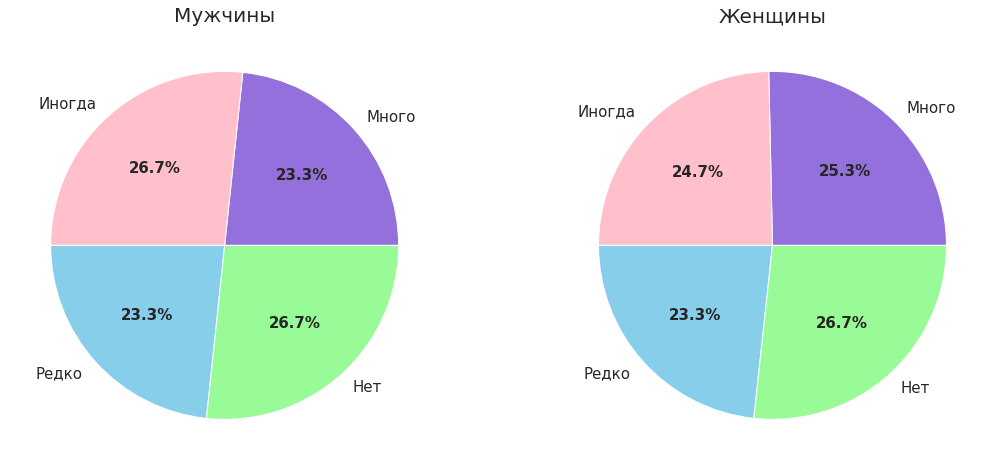

In [160]:
y_per = np.array([len(per_ocmnoga), len(per_mnoga), len(per_nemnoga), len(per_net)])
perlabels = ["Много", "Иногда", "Редко", "Нет"]
y_star = np.array([len(star_pivo), len(star_nepivo), len(star_nemnoga), len(star_net)])
starlabels = ["Много", "Иногда", "Редко", "Нет"]

mycolors = ["mediumpurple", "pink", "skyblue", "palegreen"]

plt.figure(figsize=(18, 8))

plt.subplot(1, 2 ,1)
plt.title("Мужчины", fontsize = 20)
_, text, proc = plt.pie(y_per, labels = perlabels, colors = mycolors, autopct='%.1f%%')
plt.setp(proc, size = 15, weight ="bold")
plt.setp(text, size = 15)

plt.subplot(1, 2, 2)
plt.title("Женщины", fontsize = 20)
_, text, proc = plt.pie(y_star, labels = starlabels, colors = mycolors, autopct='%.1f%%')
plt.setp(proc, size = 15, weight ="bold")
plt.setp(text, size = 15)

plt.show() 

In [161]:
per_po = data[(data["Соблюдаете порядок на рабочем месте?_Нет"] == 0) & (data["Ваш пол?_Мужской"] == 1)]
per_nepo = data[(data["Соблюдаете порядок на рабочем месте?_Нет"] == 1) & (data["Ваш пол?_Мужской"] == 1)]

star_po = data[(data["Соблюдаете порядок на рабочем месте?_Нет"] == 0) & (data["Ваш пол?_Мужской"] == 0)]
star_nepo = data[(data["Соблюдаете порядок на рабочем месте?_Нет"] == 1) & (data["Ваш пол?_Мужской"] == 0)]

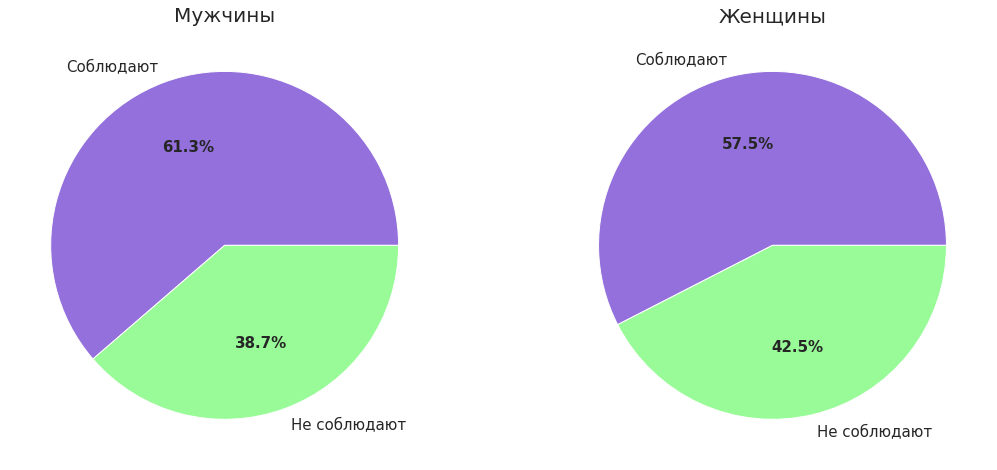

In [162]:
y_per = np.array([len(per_po), len(per_nepo)])
perlabels = ["Соблюдают", "Не соблюдают"]
y_star = np.array([len(star_po), len(star_nepo)])
starlabels = ["Соблюдают", "Не соблюдают"]

mycolors = ["mediumpurple", "palegreen"]

plt.figure(figsize=(18, 8))

plt.subplot(1, 2 ,1)
plt.title("Мужчины", fontsize = 20)
_, text, proc = plt.pie(y_per, labels = perlabels, colors = mycolors, autopct='%.1f%%')
plt.setp(proc, size = 15, weight ="bold")
plt.setp(text, size = 15)

plt.subplot(1, 2, 2)
plt.title("Женщины", fontsize = 20)
_, text, proc = plt.pie(y_star, labels = starlabels, colors = mycolors, autopct='%.1f%%')
plt.setp(proc, size = 15, weight ="bold")
plt.setp(text, size = 15)

plt.show() 

# Матрица корреляций

In [163]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ваш средний балл. Например 7.38,Кем вы себя считаете?_Амбиверт,Кем вы себя считаете?_Интроверт,Кем вы себя считаете?_Экстраверт,"Играете в компьютерные игры?_Да, иногда","Играете в компьютерные игры?_Да, редко","Играете в компьютерные игры?_Да, часто",Играете в компьютерные игры?_Нет,"Занимаетесь спортом?_Да, много","Занимаетесь спортом?_Да, немного",Занимаетесь спортом?_Нет,"Списываете ли вы домашнее задание?_В основном сам, но бывает, что катаю.",Списываете ли вы домашнее задание?_Делаю почти всё сам,Списываете ли вы домашнее задание?_Катать - это моё),Ваш курс.,Ваш пол?_Мужской,Вы курите?_Не курю,Вы пьёте алкоголь?_Пью,Часто гуляете на свежем воздухе?_Нет,Много проводите время в соц.сетях?_Нет,Соблюдаете порядок на рабочем месте?_Нет,Была ли у вас золотая медаль в школе?_Нет
Ваш средний балл. Например 7.38,1.00,-0.03,0.14,-0.11,0.02,-0.07,-0.02,0.06,-0.17,0.08,0.07,0.04,0.29,-0.23,-0.11,0.12,0.19,-0.03,-0.06,-0.06,-0.02,-0.25
Кем вы себя считаете?_Амбиверт,-0.03,1.00,-0.61,-0.49,-0.02,0.09,-0.10,-0.00,-0.04,0.08,-0.06,-0.04,-0.01,0.05,0.01,-0.11,-0.08,0.14,-0.01,-0.06,0.09,-0.05
Кем вы себя считаете?_Интроверт,0.14,-0.61,1.00,-0.40,0.10,-0.16,0.00,0.06,-0.04,-0.07,0.13,0.17,0.09,-0.24,-0.03,0.07,0.23,-0.26,0.16,0.00,-0.07,0.02
Кем вы себя считаете?_Экстраверт,-0.11,-0.49,-0.40,1.00,-0.09,0.07,0.11,-0.07,0.09,-0.02,-0.07,-0.14,-0.09,0.20,0.02,0.06,-0.16,0.12,-0.16,0.06,-0.03,0.03
"Играете в компьютерные игры?_Да, иногда",0.02,-0.02,0.10,-0.09,1.00,-0.32,-0.19,-0.41,0.06,-0.06,0.02,0.00,0.10,-0.07,-0.05,0.17,-0.02,-0.02,0.07,-0.02,0.10,0.08
"Играете в компьютерные игры?_Да, редко",-0.07,0.09,-0.16,0.07,-0.32,1.00,-0.23,-0.50,-0.08,0.14,-0.09,-0.04,-0.02,0.05,-0.01,0.11,-0.01,-0.02,-0.01,-0.08,-0.04,0.00
"Играете в компьютерные игры?_Да, часто",-0.02,-0.10,0.00,0.11,-0.19,-0.23,1.00,-0.30,-0.01,-0.05,0.07,0.02,-0.04,0.01,0.07,0.08,-0.03,-0.04,-0.06,-0.01,0.06,-0.01
Играете в компьютерные игры?_Нет,0.06,-0.00,0.06,-0.07,-0.41,-0.50,-0.30,1.00,0.02,-0.04,0.02,0.02,-0.04,0.01,-0.00,-0.30,0.04,0.06,-0.01,0.10,-0.09,-0.06
"Занимаетесь спортом?_Да, много",-0.17,-0.04,-0.04,0.09,0.06,-0.08,-0.01,0.02,1.00,-0.60,-0.29,0.00,-0.02,0.01,0.00,0.06,0.03,0.05,-0.22,-0.01,-0.09,0.08
"Занимаетесь спортом?_Да, немного",0.08,0.08,-0.07,-0.02,-0.06,0.14,-0.05,-0.04,-0.60,1.00,-0.59,-0.00,-0.04,0.02,-0.05,-0.11,-0.09,0.07,-0.08,-0.02,0.09,-0.04


# Обучение модели

In [164]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

sns.set(font_scale=1.5)

In [165]:
X = data.iloc[:, 1:]
y = df["Ваш средний балл. Например 7.38"]
X

In [167]:
X.shape

((223, 21), (223, 12))

In [168]:
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.7,
                                                    random_state=42)

# Используем Линейную Регрессию

In [169]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

train_predictions = regr.predict(x_train) 
test_predictions = regr.predict(x_test)

print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))


Train MSE: 0.7428692310386745
Test MSE: 1.1773988115388956


# Добавляем Регуляризацию

In [170]:
from sklearn.linear_model import ElasticNetCV

clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10]) 
clf.fit(x_train, y_train) 

train_predictions = clf.predict(x_train) 
test_predictions = clf.predict(x_test) 
print("Train MSE: {}".format(mean_squared_error(y_train, train_predictions)))
print("Test MSE: {}".format(mean_squared_error(y_test, test_predictions)))

Train MSE: 0.7888298313344307
Test MSE: 1.2626414783045794
